In [1]:
### Version : Python 3.10.12
### Coding : UTF-8

In [2]:
### We import packages

# To manage dataframes
import numpy as np
import pandas as pd

# To do the clustering
from sklearn.cluster import KMeans

# To realize graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go


In [3]:
### We import our python files

import preprocessing

In [4]:
### We import our dataframes and lists

lidar_easy = preprocessing.lidar_easy
lidar_medium = preprocessing.lidar_medium
lidar_hard = preprocessing.lidar_hard
lidar_extrahard = preprocessing.lidar_extrahard

list_df = preprocessing.list_df
list_difficulty = preprocessing.list_difficulty


In [5]:
# We check what the dataframes look like
lidar_easy.head(n = 5)

,index,x,y,z,x_rotated,y_rotated
0,0,12.027449,-21.919416,11.557937,0.045431,-25.002366
1,7,11.780415,-21.631120,11.554015,-0.033131,-24.630925
2,8,11.802714,-21.606439,11.468175,-0.001729,-24.619956
3,12,11.725748,-21.450815,11.473142,0.005343,-24.446484
4,13,11.658920,-21.392229,11.492596,-0.025213,-24.363030


In [6]:
### Clustering
# We use k-means to perform the clustering
# We know that for easy, hard and extrahard files, there are only 3 clusters
# For medium file, there are 7 clusters

var = ["x_rotated"]
i = 0
# We define the number of clusters
for df in list_df :
    if i == 1 :
        nb_clusters = 7
    else :
        nb_clusters = 3
    # We fit the model of k-means
    model = KMeans(n_clusters = nb_clusters, init = "k-means++", n_init = 10, random_state = 42)
    df["cluster"] = model.fit(df[var]).labels_
    i += 1

In [7]:
# We check result
lidar_easy

,index,x,y,z,x_rotated,y_rotated,cluster
0,0,12.027449,-21.919416,11.557937,0.045431,-25.002366,2
1,7,11.780415,-21.631120,11.554015,-0.033131,-24.630925,2
2,8,11.802714,-21.606439,11.468175,-0.001729,-24.619956,2
3,12,11.725748,-21.450815,11.473142,0.005343,-24.446484,2
4,13,11.658920,-21.392229,11.492596,-0.025213,-24.363030,2
...,...,...,...,...,...,...,...
1497,2997,-12.594755,21.327550,11.458369,-0.827054,24.754963,1
1498,2998,-12.662449,21.386325,11.509484,-0.858279,24.838999,1
1499,2999,-12.702087,21.339329,11.480640,-0.915597,24.816761,1
1500,3001,-12.749286,21.452882,11.526176,-0.902573,24.939041,1


In [8]:
### We visualize result

i = 0
for df in list_df:
    x = df['x']
    y = df['y']
    z = df['z']
    color = df['cluster']
    fig = go.Figure()
    scatter_trace = go.Scatter3d(x = x, y = y, z = z, mode = 'markers', marker = dict(size = 4, color = color, colorscale = 'Viridis'))
    fig.add_trace(scatter_trace)
    fig.update_layout(scene = dict(xaxis_title = 'X', yaxis_title = 'Y', zaxis_title = 'Z'),
                      title = f"{list_difficulty[i]} file")
    fig.show()
    i += 1


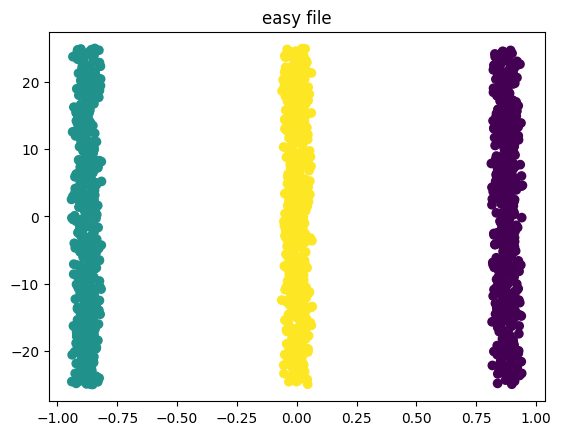

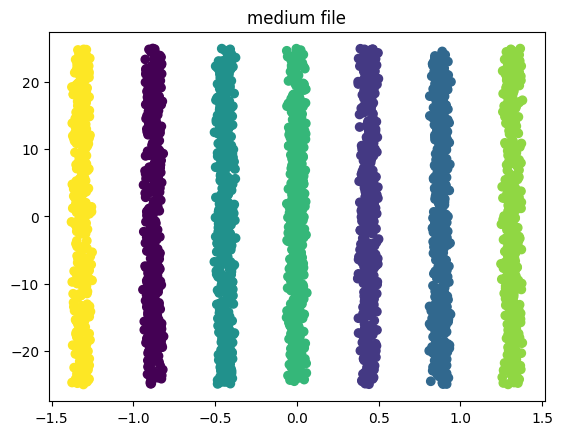

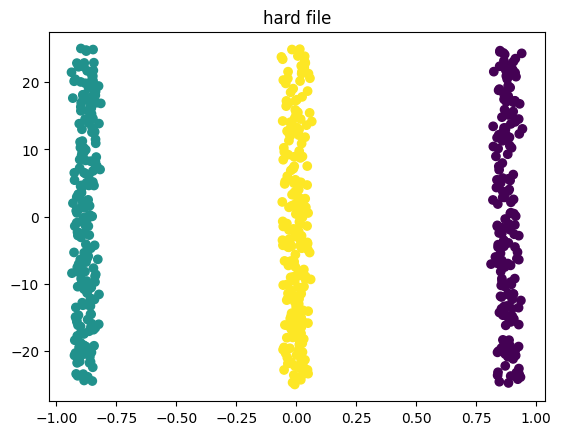

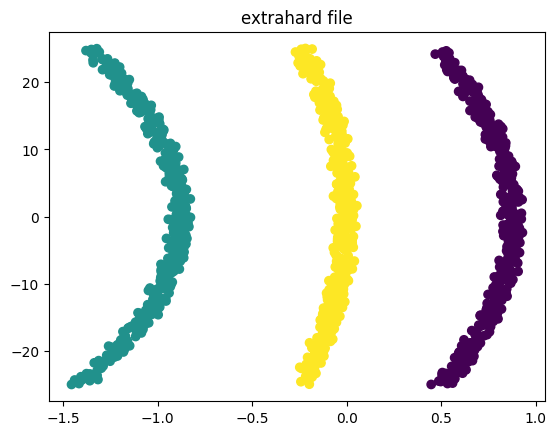

In [9]:
### We check that clustering was perfectly done

i = 0
for df in list_df : 
    x = df['x_rotated']
    y = df['y_rotated']
    color = df['cluster']
    plt.scatter(x, y, c=color, cmap = 'viridis')
    plt.title(f"{list_difficulty[i]} file")
    plt.show()
    i += 1